<a href="https://www.kaggle.com/code/pranavmaheshwari2603/santander-customer-transaction-prediction?scriptVersionId=146435736" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/santander-customer-transaction-prediction/sample_submission.csv
/kaggle/input/santander-customer-transaction-prediction/train.csv
/kaggle/input/santander-customer-transaction-prediction/test.csv


In [2]:
train=pd.read_csv('/kaggle/input/santander-customer-transaction-prediction/train.csv')
test=pd.read_csv('/kaggle/input/santander-customer-transaction-prediction/test.csv')

In [3]:
train.shape

(200000, 202)

In [4]:
test.shape

(200000, 201)

In [5]:
train.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 202 columns]

In [6]:
test.head()

ID_code    var_0    var_1    var_2   var_3    var_4   var_5   var_6  \
0  test_0  11.0656   7.7798  12.9536  9.4292  11.4327 -2.3805  5.8493   
1  test_1   8.5304   1.2543  11.3047  5.1858   9.1974 -4.0117  6.0196   
2  test_2   5.4827 -10.3581  10.1407  7.0479  10.2628  9.8052  4.8950   
3  test_3   8.5374  -1.3222  12.0220  6.5749   8.8458  3.1744  4.9397   
4  test_4  11.7058  -0.1327  14.1295  7.7506   9.1035 -8.5848  6.8595   

     var_7   var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.2675  2.1337  ...  -2.1556  11.8495  -1.4300   2.4508  13.7112   2.4669   
1  18.6316 -4.4131  ...  10.6165   8.8349   0.9403  10.1282  15.5765   0.4773   
2  20.2537  1.5233  ...  -0.7484  10.9935   1.9803   2.1800  12.9813   2.1281   
3  20.5660  3.3755  ...   9.5702   9.0766   1.6580   3.5813  15.1874   3.1656   
4  10.6048  2.9890  ...   4.2259   9.1723   1.2835   3.3778  19.5542  -0.2860   

   var_196  var_197  var_198  var_199  
0   4.3654  10.7200  15.4722  -8.7197  
1  -1.4852   9.8714  19.1293 -20.9760  
2  -7.1086   7.0618  19.8956 -23.1794  
3   3.9567   9.2295  13.0168  -4.2108  
4  -5.1612   7.2882  13.9260  -9.1846  

[5 rows x 201 columns]

In [7]:
train.isnull().sum().sum()

0

In [8]:
test.isnull().sum().sum()

0

No null entry in entire dataset

In [9]:
train.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean       16.545850       0.284162  ...       3.234440       7.438408   
std         3.418076       3.332634  ...       4.559922       3.023272   
min         5.349700     -10.505500  ...     -14.093300      -2.691700   
25%        13.943800      -2.317800  ...      -0.058825       5.157400   
50%        16.456800       0.393700  ...       3.203600       7.347750   
75%        19.102900       2.937900  ...       6.406200       9.512525   
max        27.691800      10.151300  ...      18.440900      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.927839       3.331774      17.993784      -0.142088   
std         1.478423       3.992030       3.135162       1.429372   
min        -3.814500     -11.783400       8.694400      -5.261000   
25%         0.889775       0.584600      15.629800      -1.170700   
50%         1.901300       3.396350      17.957950      -0.172700   
75%         2.949500       6.205800      20.396525       0.829600   
max         8.402400      18.281800      27.928800       4.272900   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.303335       8.908158      15.870720      -3.326537  
std         5.454369       0.921625       3.010945      10.438015  
min       -14.209600       5.960600       6.299300     -38.852800  
25%        -1.946925       8.252800      13.829700     -11.208475  
50%         2.408900       8.888200      15.934050      -2.819550  
75%         6.556725       9.593300      18.064725       4.836800  
max        18.321500      12.000400      26.079100      28.500700  

[8 rows x 201 columns]

In [10]:
test.describe()

var_0          var_1          var_2          var_3  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       10.658737      -1.624244      10.707452       6.788214   
std         3.036716       4.040509       2.633888       2.052724   
min         0.188700     -15.043400       2.355200      -0.022400   
25%         8.442975      -4.700125       8.735600       5.230500   
50%        10.513800      -1.590500      10.560700       6.822350   
75%        12.739600       1.343400      12.495025       8.327600   
max        22.323400       9.385100      18.714100      13.142000   

               var_4          var_5          var_6          var_7  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       11.076399      -5.050558       5.415164      16.529143   
std         1.616456       7.869293       0.864686       3.424482   
min         5.484400     -27.767000       2.216400       5.713700   
25%         9.891075     -11.201400       4.772600      13.933900   
50%        11.099750      -4.834100       5.391600      16.422700   
75%        12.253400       0.942575       6.005800      19.094550   
max        16.037100      17.253700       8.302500      28.292800   

               var_8          var_9  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean        0.277135       7.569407  ...       3.189766       7.458269   
std         3.333375       1.231865  ...       4.551239       3.025189   
min        -9.956000       4.243300  ...     -14.093300      -2.407000   
25%        -2.303900       6.623800  ...      -0.095000       5.166500   
50%         0.372000       7.632000  ...       3.162400       7.379000   
75%         2.930025       8.584825  ...       6.336475       9.531100   
max         9.665500      11.003600  ...      20.359000      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.925944       3.322016      17.996967      -0.133657   
std         1.479966       3.995599       3.140652       1.429678   
min        -3.340900     -11.413100       9.382800      -4.911900   
25%         0.882975       0.587600      15.634775      -1.160700   
50%         1.892600       3.428500      17.977600      -0.162000   
75%         2.956000       6.174200      20.391725       0.837900   
max         8.005000      17.632600      27.947800       4.545400   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.290899       8.912428      15.869184      -3.246342  
std         5.446346       0.920904       3.008717      10.398589  
min       -13.944200       6.169600       6.584000     -39.457800  
25%        -1.948600       8.260075      13.847275     -11.124000  
50%         2.403600       8.892800      15.943400      -2.725950  
75%         6.519800       9.595900      18.045200       4.935400  
max        15.920700      12.275800      26.538400      27.907400  

[8 rows x 200 columns]

# EDA

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='target', ylabel='count'>

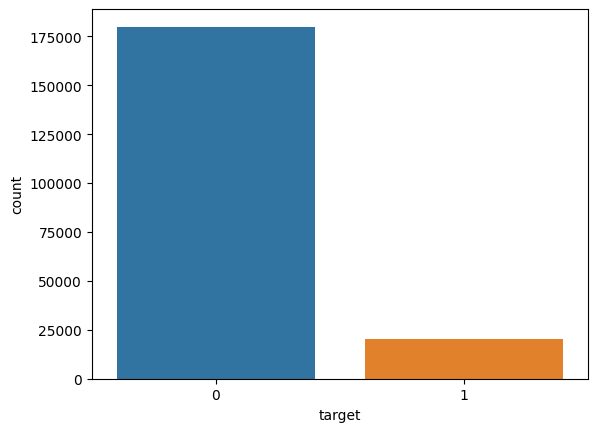

In [11]:
import seaborn as sns
sns.countplot(x ='target', data = train)

In [12]:
print('Number of {}% target values 1'.format(100 * train["target"].value_counts()[1]/train.shape[0]))

Number of 10.049% target values 1


In [13]:
import warnings
warnings.filterwarnings('ignore')

 plt. xticks() gets or sets the properties of tick locations and labels of the x-axis.
 
 Seaborn Distplot represents the overall distribution of continuous data variables
 
 As by default parameter of distplot is hist we will use hist=False

#### As there are number of features with 0-1 type distribution we can make dist plots to analyze them easily as a whole.

In [14]:
import matplotlib.pyplot as plt
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style("whitegrid")
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(10,10,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        loc, labels = plt.xticks()
        plt.tick_params(axis='x',  labelsize=6, pad=-4)
        plt.tick_params(axis='y', labelsize=6)
        plt.legend(labels=[label1,label2])
    plt.show();

<Figure size 640x480 with 0 Axes>

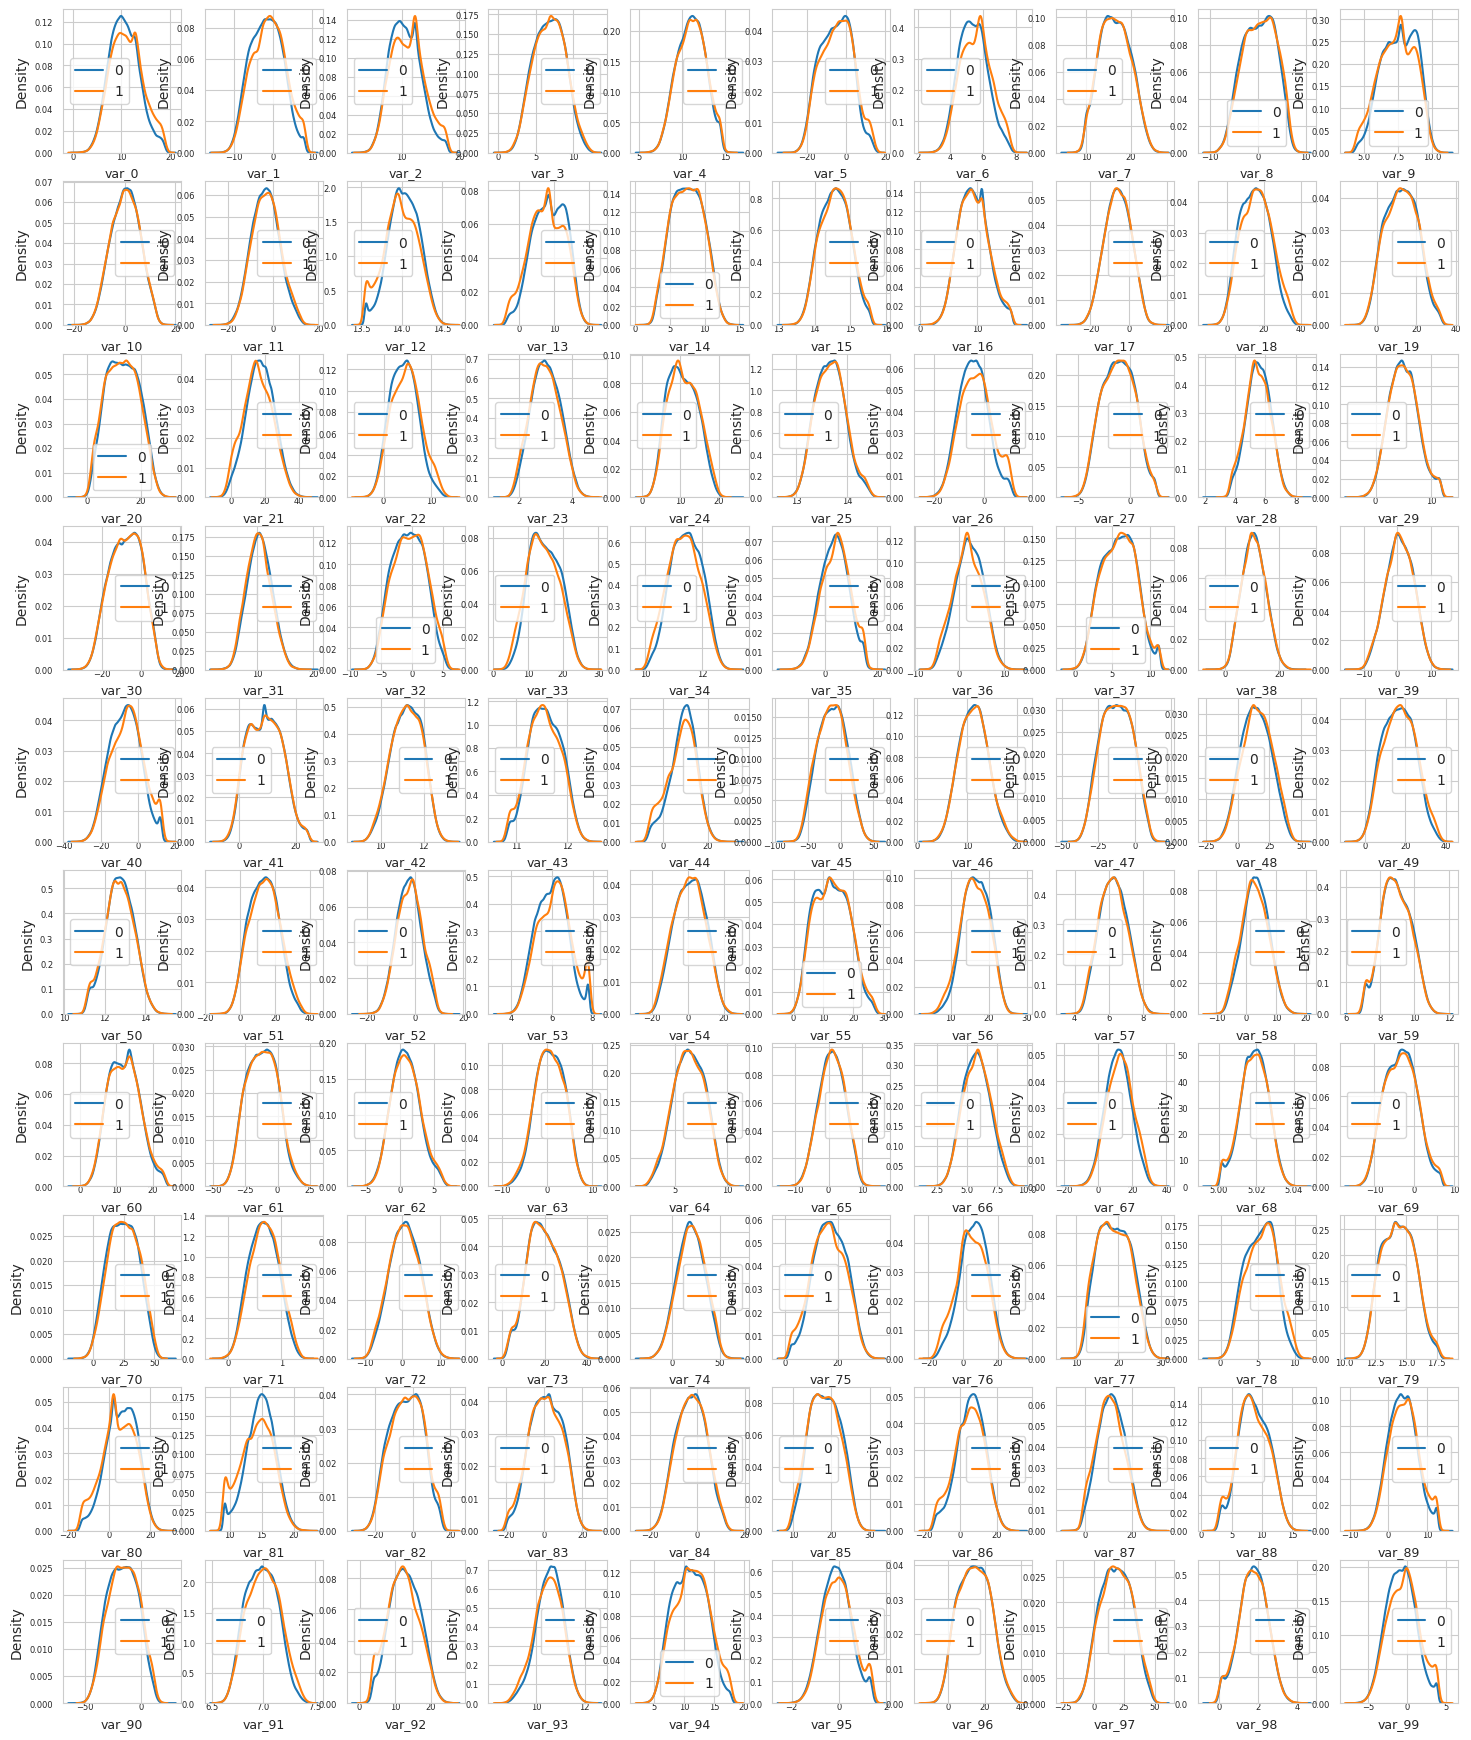

In [15]:
t0 = train.loc[train['target'] == 0]
t1 = train.loc[train['target'] == 1]
features = train.columns.values[2:102]
plot_feature_distribution(t0, t1, '0', '1', features)

<Figure size 640x480 with 0 Axes>

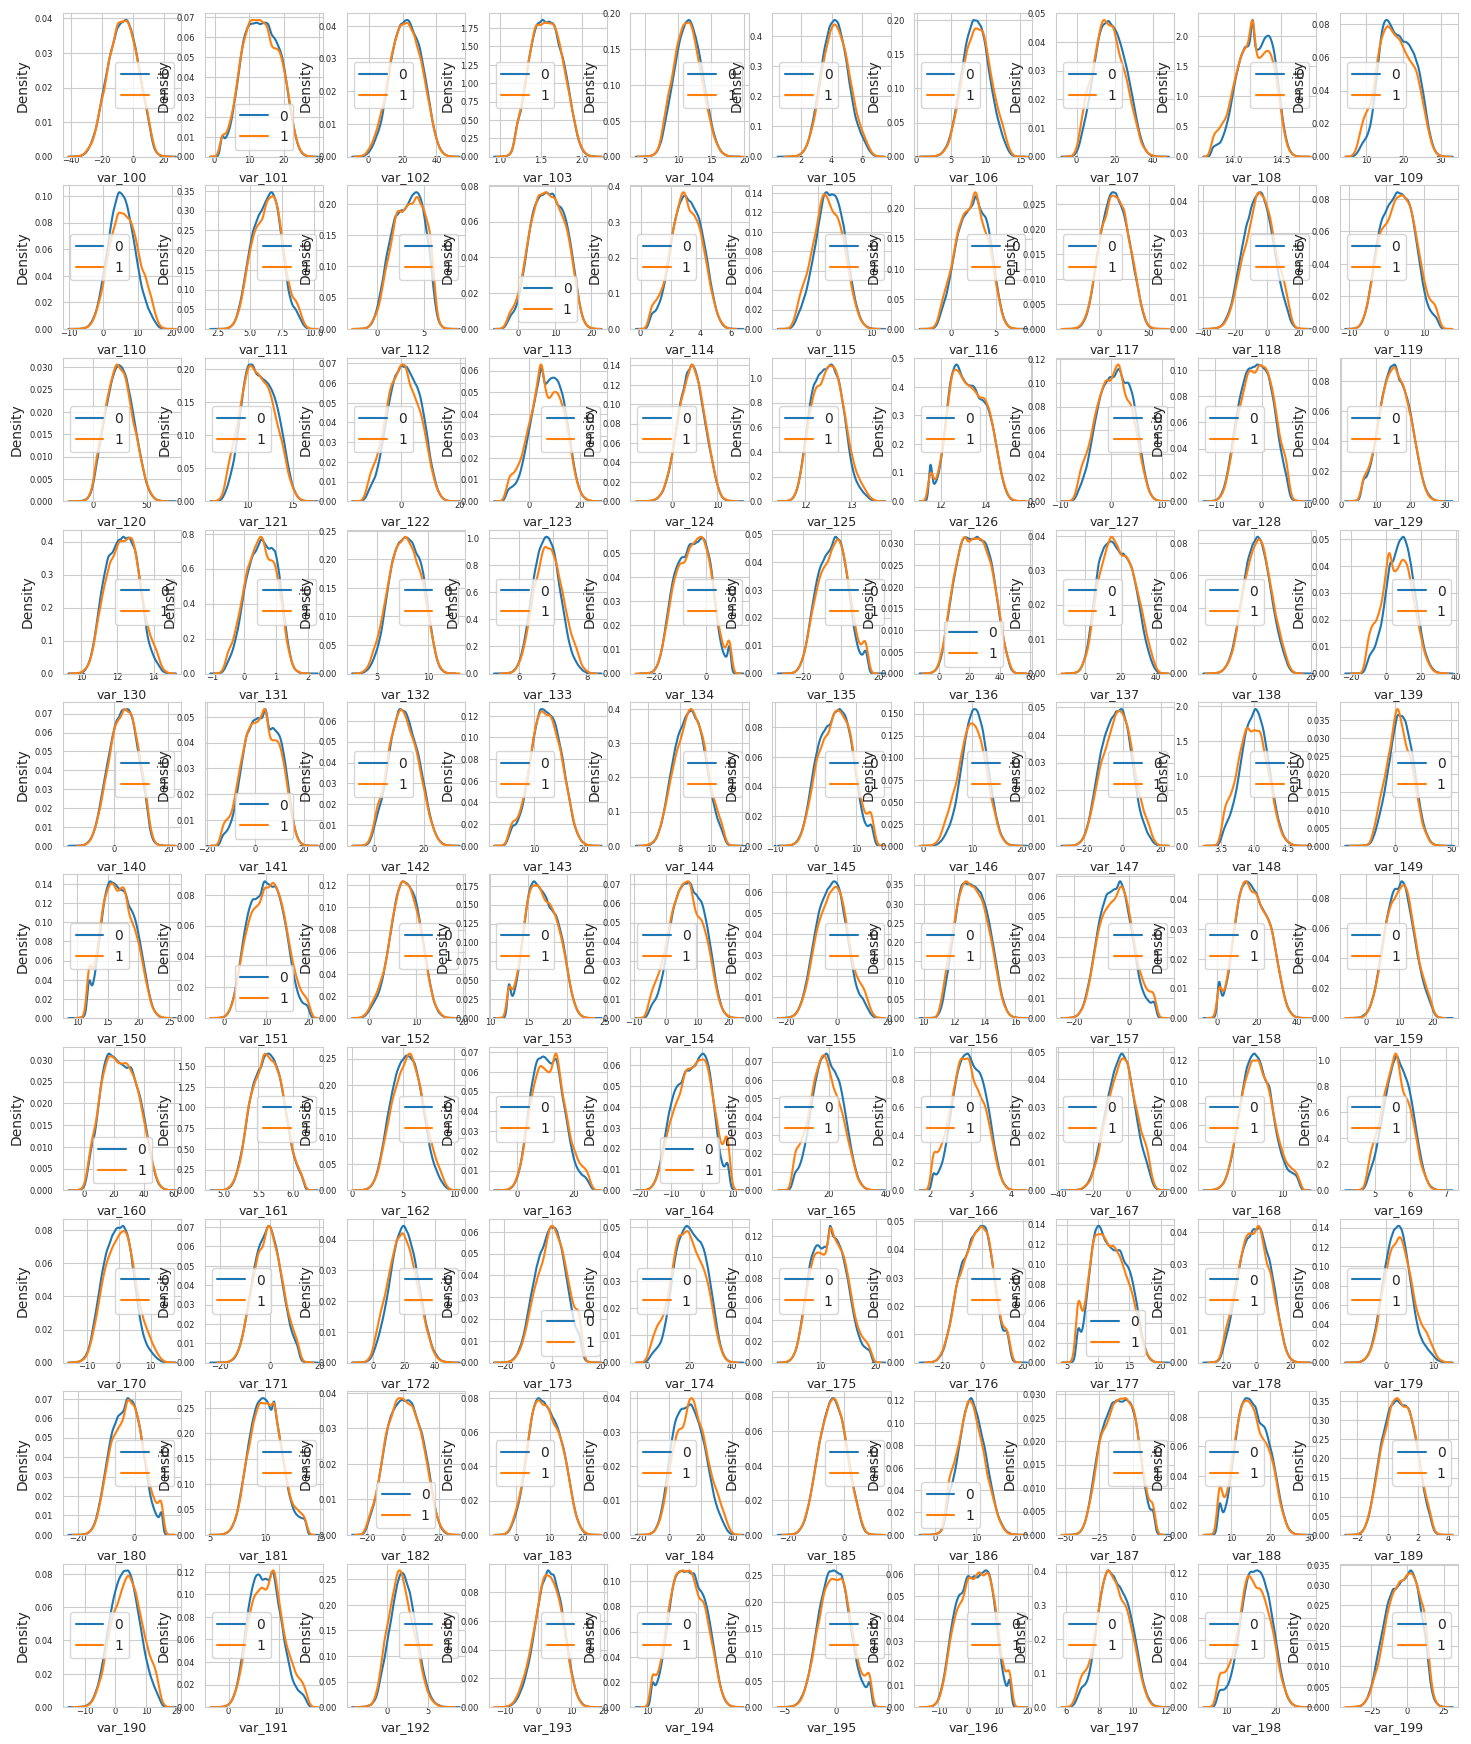

In [16]:
features = train.columns.values[102:202]
plot_feature_distribution(t0, t1, '0', '1', features)

In the above samples we can see in some plots they exactly overlap and in some there is a differnce in distribution patterns.

<Figure size 640x480 with 0 Axes>

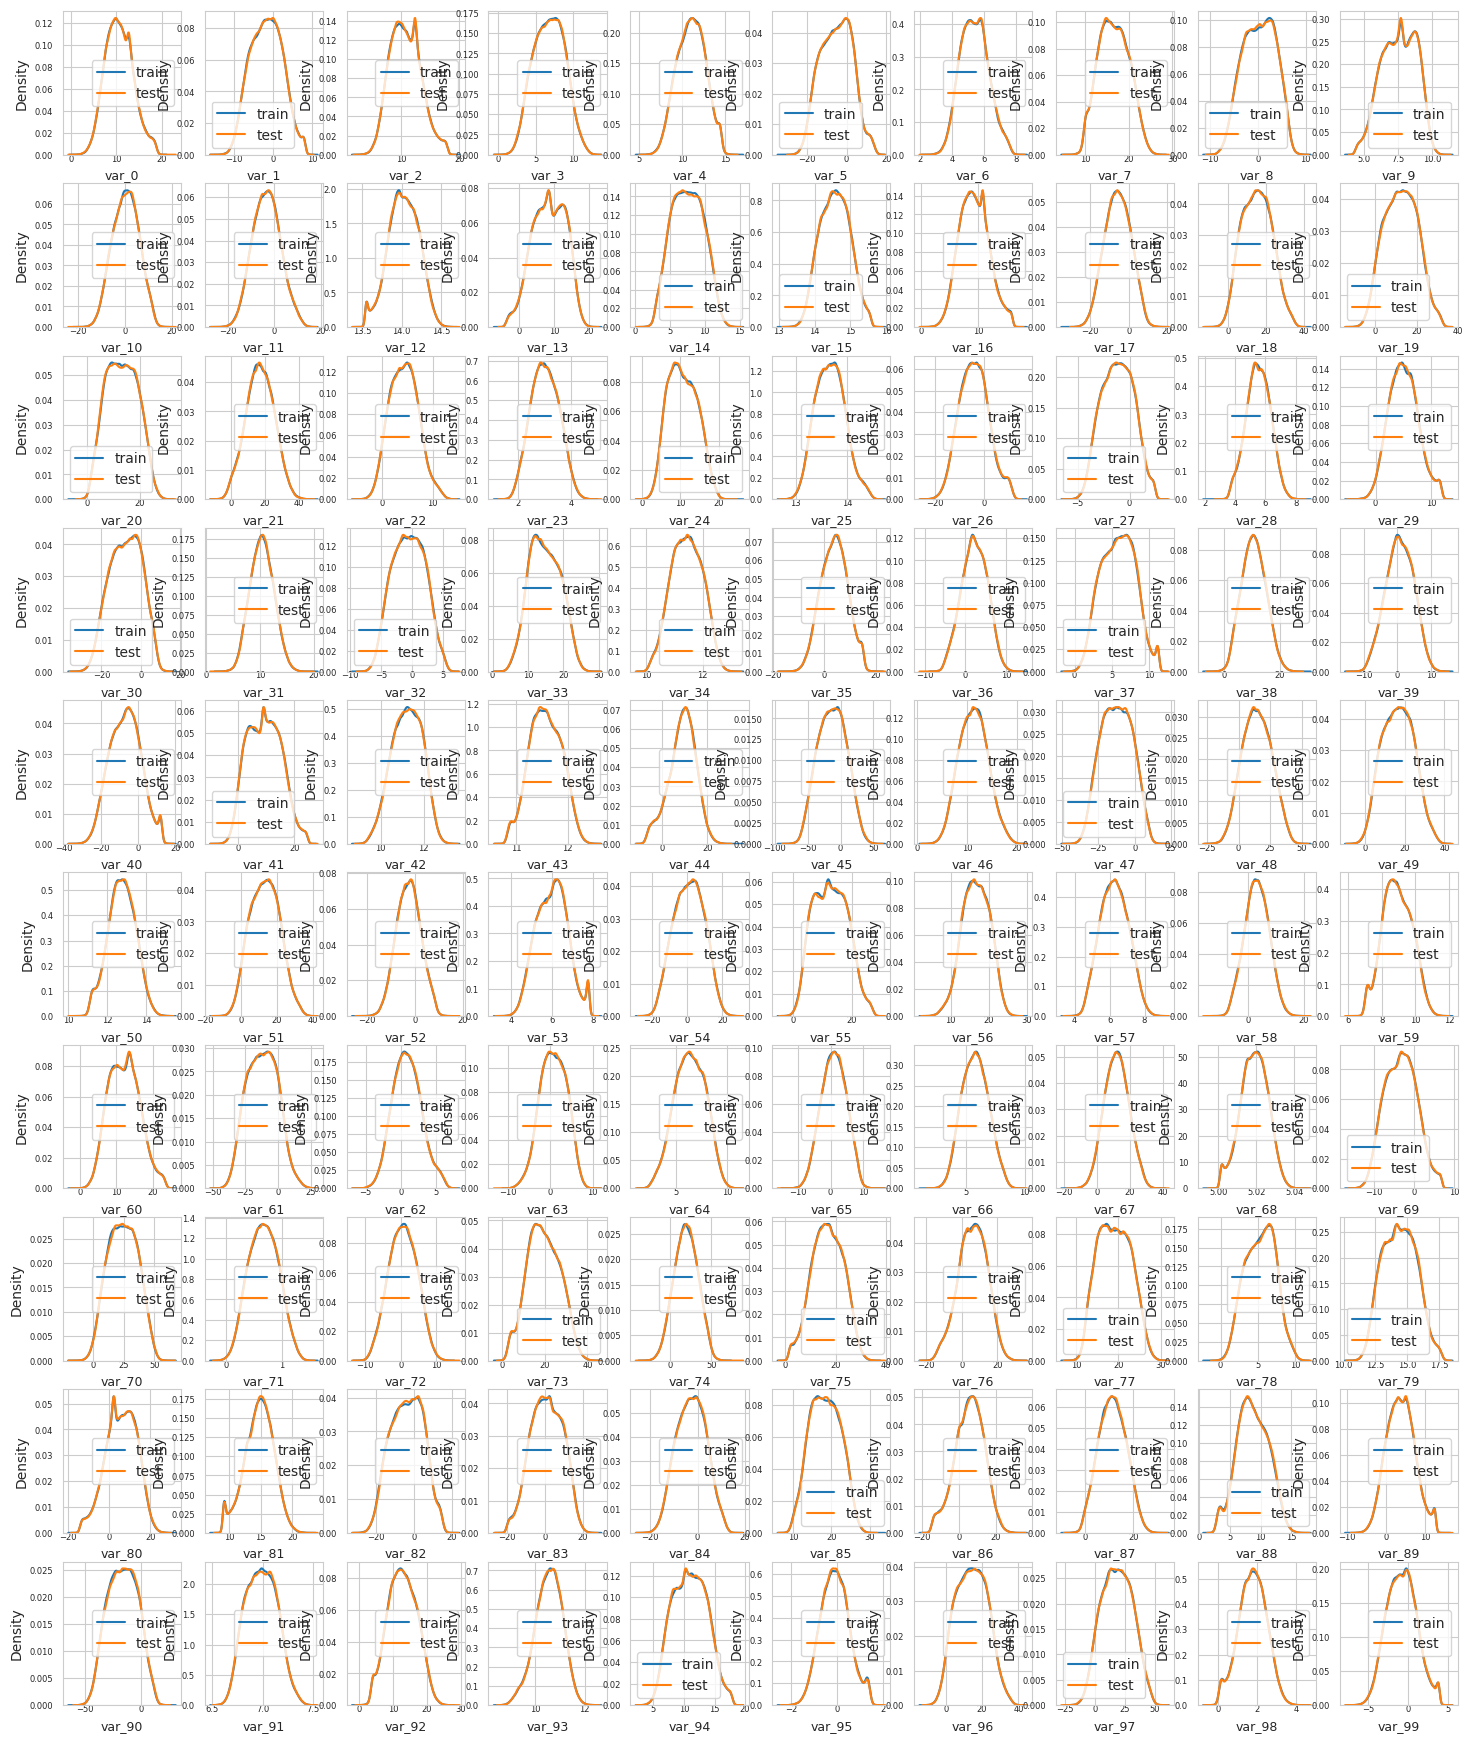

In [17]:
features = train.columns.values[2:102]
plot_feature_distribution(train, test, 'train', 'test', features)

Train test distribution nearly overlaps for most of the cases so it seems to be well balanced

#### Now let's analyse distribution of mean,standard deviation,min and max over rows and columns.

###### Mean values per row and column in the train and test set.

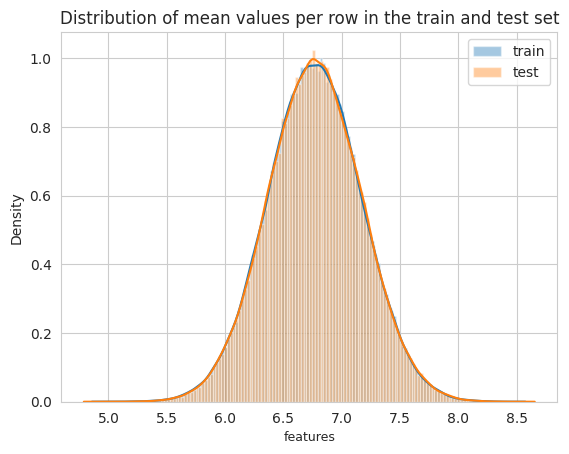

In [18]:
plt.figure()
features = train.columns.values[2:202]
plt.title("Distribution of mean values per row in the train and test set")

sns.distplot(train[features].mean(axis=1),kde=True,bins=150,label='train')
sns.distplot(test[features].mean(axis=1), kde=True,bins=150,label='test')

plt.xlabel('features', fontsize=9)

plt.legend()
plt.show();

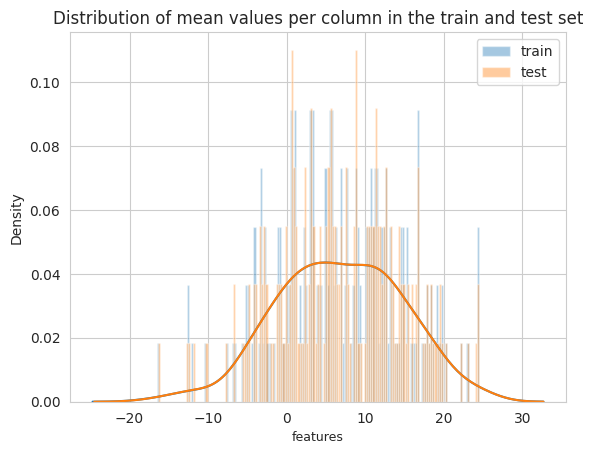

In [19]:
plt.figure()
features = train.columns.values[2:202]
plt.title("Distribution of mean values per column in the train and test set")

sns.distplot(train[features].mean(axis=0),kde=True,bins=150,label='train')
sns.distplot(test[features].mean(axis=0), kde=True,bins=150,label='test')

plt.xlabel('features', fontsize=9)

plt.legend()
plt.show();

row have close normal distribution.

column have kurtosis

###### Standard Deviation values per row and column in the train and test set.

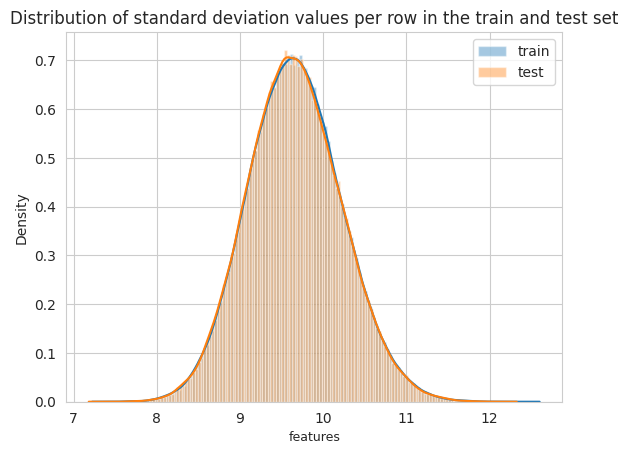

In [20]:
plt.figure()
features = train.columns.values[2:202]
plt.title("Distribution of standard deviation values per row in the train and test set")

sns.distplot(train[features].std(axis=1),kde=True,bins=150,label='train')
sns.distplot(test[features].std(axis=1), kde=True,bins=150,label='test')

plt.xlabel('features', fontsize=9)

plt.legend()
plt.show();

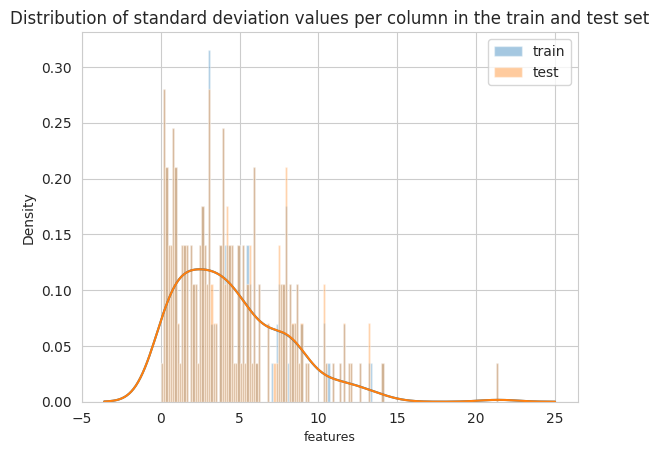

In [21]:
plt.figure()
features = train.columns.values[2:202]
plt.title("Distribution of standard deviation values per column in the train and test set")

sns.distplot(train[features].std(axis=0),kde=True,bins=150,label='train')
sns.distplot(test[features].std(axis=0), kde=True,bins=150,label='test')

plt.xlabel('features', fontsize=9)

plt.legend()
plt.show();

row have close normal distribution.

column have skewness

###### Min values per row and column in the train and test set.

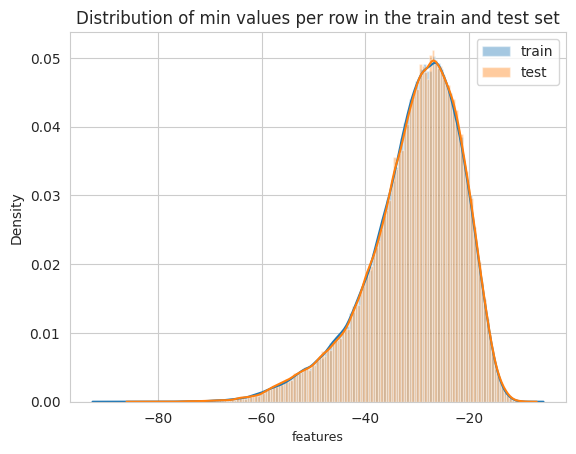

In [22]:
plt.figure()
features = train.columns.values[2:202]
plt.title("Distribution of min values per row in the train and test set")

sns.distplot(train[features].min(axis=1),kde=True,bins=150,label='train')
sns.distplot(test[features].min(axis=1), kde=True,bins=150,label='test')

plt.xlabel('features', fontsize=9)

plt.legend()
plt.show();

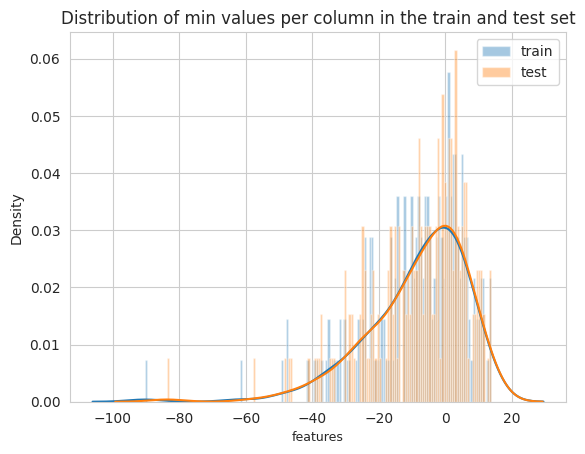

In [23]:
plt.figure()
features = train.columns.values[2:202]
plt.title("Distribution of min values per column in the train and test set")

sns.distplot(train[features].min(axis=0),kde=True,bins=150,label='train')
sns.distplot(test[features].min(axis=0), kde=True,bins=150,label='test')

plt.xlabel('features', fontsize=9)

plt.legend()
plt.show();

Both plots have normal distribution with skewness

###### Max values per row in the train and test set.

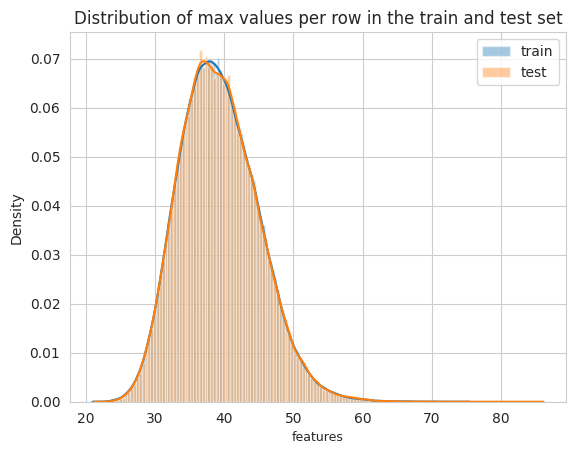

In [24]:
plt.figure()
features = train.columns.values[2:202]
plt.title("Distribution of max values per row in the train and test set")

sns.distplot(train[features].max(axis=1),kde=True,bins=150,label='train')
sns.distplot(test[features].max(axis=1), kde=True,bins=150,label='test')

plt.xlabel('features', fontsize=9)

plt.legend()
plt.show();

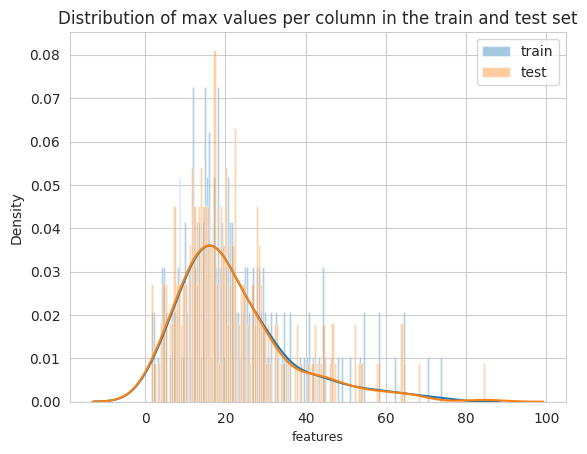

In [25]:
plt.figure()
features = train.columns.values[2:202]
plt.title("Distribution of max values per column in the train and test set")

sns.distplot(train[features].max(axis=0),kde=True,bins=150,label='train')
sns.distplot(test[features].max(axis=0), kde=True,bins=150,label='test')

plt.xlabel('features', fontsize=9)

plt.legend()
plt.show();

Row have almost normal distribution with very minimal skewness

Column have skewness

#### Now let's analyse Correlation via heatmap.

<Axes: >

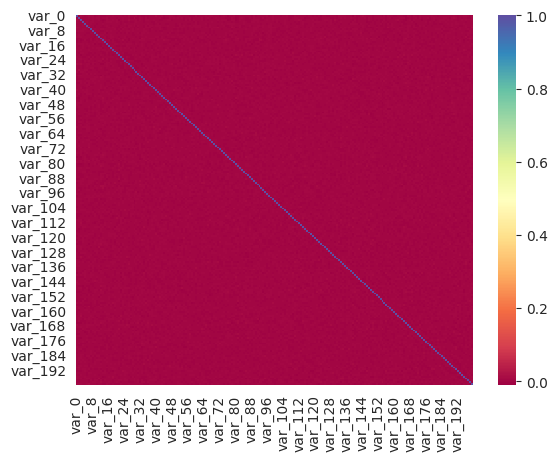

In [26]:
sns.heatmap(train[features].corr(), cmap="Spectral")

As number of features are quite high heatmap is not a better choice we should create a dataframe and sort by values.

Pandas. DataFrame. unstack() is used to reshape the given Pandas DataFrame by transposing specified row level to column level.

In [27]:
correlations = train[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.head(10)

level_0  level_1             0
0   var_75  var_191  2.703975e-08
1  var_191   var_75  2.703975e-08
2  var_173    var_6  5.942735e-08
3    var_6  var_173  5.942735e-08
4  var_126  var_109  1.313947e-07
5  var_109  var_126  1.313947e-07
6  var_144   var_27  1.772502e-07
7   var_27  var_144  1.772502e-07
8  var_177  var_100  3.116544e-07
9  var_100  var_177  3.116544e-07

From this we can say that there is very less correlation between the variables. We have used absolute so that we can even observe high negative correlations. But here there are none.

#### Now let's check for Duplicate entries

As we have already check for null entries we should also check for the duplicate ones.

In [28]:
train[train[features].duplicated()]

Empty DataFrame
Columns: [ID_code, target, var_0, var_1, var_2, var_3, var_4, var_5, var_6, var_7, var_8, var_9, var_10, var_11, var_12, var_13, var_14, var_15, var_16, var_17, var_18, var_19, var_20, var_21, var_22, var_23, var_24, var_25, var_26, var_27, var_28, var_29, var_30, var_31, var_32, var_33, var_34, var_35, var_36, var_37, var_38, var_39, var_40, var_41, var_42, var_43, var_44, var_45, var_46, var_47, var_48, var_49, var_50, var_51, var_52, var_53, var_54, var_55, var_56, var_57, var_58, var_59, var_60, var_61, var_62, var_63, var_64, var_65, var_66, var_67, var_68, var_69, var_70, var_71, var_72, var_73, var_74, var_75, var_76, var_77, var_78, var_79, var_80, var_81, var_82, var_83, var_84, var_85, var_86, var_87, var_88, var_89, var_90, var_91, var_92, var_93, var_94, var_95, var_96, var_97, ...]
Index: []

[0 rows x 202 columns]

There might be values in column which might repeat for a particular variable which could be checked by value_counts(). This could easily be checked by running the commented code on next line.

In [29]:
#for feature in features:
    #print(train[feature].value_counts())

idxmax is used for getting index of maximum value.
max is used for getting the maximum value.

In [30]:
unique_max_train = []
unique_max_test = []
for feature in features:
    values = train[feature].value_counts()
    unique_max_train.append([feature, values.max(), values.idxmax()])
    values = test[feature].value_counts()
    unique_max_test.append([feature, values.max(), values.idxmax()])

In [31]:
unique_max_train

[['var_0', 11, 10.6829],
 ['var_1', 10, -1.1853],
 ['var_2', 12, 9.1497],
 ['var_3', 15, 6.8029],
 ['var_4', 15, 10.8911],
 ['var_5', 7, 2.2804],
 ['var_6', 22, 5.1153],
 ['var_7', 11, 18.9966],
 ['var_8', 11, -2.2274],
 ['var_9', 18, 7.2048],
 ['var_10', 9, 0.8671],
 ['var_11', 8, -6.5005],
 ['var_12', 203, 13.5545],
 ['var_13', 9, 9.1917],
 ['var_14', 12, 8.9383],
 ['var_15', 34, 14.6482],
 ['var_16', 14, 10.743],
 ['var_17', 8, -8.2807],
 ['var_18', 9, 10.2625],
 ['var_19', 7, 15.5568],
 ['var_20', 10, 8.5437],
 ['var_21', 10, 13.9733],
 ['var_22', 11, 4.9226],
 ['var_23', 32, 2.9116],
 ['var_24', 10, 13.5674],
 ['var_25', 41, 13.6723],
 ['var_26', 9, 0.7814],
 ['var_27', 15, -0.5237],
 ['var_28', 24, 5.3723],
 ['var_29', 12, 4.441],
 ['var_30', 6, -14.9372],
 ['var_31', 14, 10.1993],
 ['var_32', 13, -1.0086],
 ['var_33', 13, 11.1284],
 ['var_34', 30, 11.1229],
 ['var_35', 10, 6.5746],
 ['var_36', 13, 2.5371],
 ['var_37', 13, 4.9476],
 ['var_38', 9, 10.3302],
 ['var_39', 10, 0.1856]

Let's convert it into a dataframe and transpose the matrix.

In [32]:
np.transpose(pd.DataFrame(data = unique_max_train,columns =["Feature", "Max duplicates","Value"]).sort_values(by = 'Max duplicates', ascending=False))

68       108      126      12      91       103      148  \
Feature         var_68  var_108  var_126   var_12  var_91  var_103  var_148   
Max duplicates    1084      313      305      203      66       61       59   
Value           5.0214  14.1999  11.5356  13.5545  6.9785   1.6662   4.0456   

                   71       161      25   ...      70       74       90   \
Feature         var_71  var_161   var_25  ...   var_70   var_74   var_90   
Max duplicates      54       52       41  ...        7        7        7   
Value           0.7031   5.7688  13.6723  ...  31.4509  25.6287 -15.9328   

                   96       120      199     61       187      30       136  
Feature         var_96  var_120  var_199  var_61  var_187   var_30  var_136  
Max duplicates       7        7        7       6        6        6        6  
Value           8.6561  23.1806  -3.9853 -4.3454    -3.48 -14.9372   25.892  

[3 rows x 200 columns]

For unique_max_test 

In [33]:
np.transpose(pd.DataFrame(data = unique_max_test,columns =["Feature", "Max duplicates","Value"]).sort_values(by = 'Max duplicates', ascending=False))

68       126      108      12      91       103      148  \
Feature         var_68  var_126  var_108   var_12  var_91  var_103  var_148   
Max duplicates    1104      307      302      188      86       78       74   
Value           5.0197  11.5357  14.1999  13.5546  6.9939   1.4659   4.0004   

                    161      25      71   ...      70       120      176  \
Feature         var_161   var_25  var_71  ...   var_70  var_120  var_176   
Max duplicates       69       60      60  ...       14       14       14   
Value            5.7114  13.5965  0.5389  ...  26.1051  37.0676  -2.0551   

                    61       187      102      74       136      45      54   
Feature          var_61  var_187  var_102   var_74  var_136   var_45  var_54  
Max duplicates       14       14       14       13       13       13      13  
Value          -11.0639   0.1931   18.272  16.5129   9.7635 -15.5899  6.0151  

[3 rows x 200 columns]





Almost same columns in train and test have same or very close number of duplicates of same or very close values . The order is also similar 

# Feture Engineering

To make model a bit more robust we can add some basic featues like mean,max,min,std,median so that it can also learn on these features along with one's provided in dataframe.

In [34]:
train['median']  = train[features].sum(axis=1)  
train['min']  = train[features].min(axis=1)
train['max']  = train[features].max(axis=1)
train['mean'] = train[features].mean(axis=1)
train['std']  = train[features].std(axis=1)

In [35]:
test['median']  = test[features].sum(axis=1)  
test['min']  = test[features].min(axis=1)
test['max']  = test[features].max(axis=1)
test['mean'] = test[features].mean(axis=1)
test['std']  = test[features].std(axis=1)

In [36]:
train.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_195  var_196  var_197  var_198  var_199     median  \
0  18.6266  ...  -2.3978   7.8784   8.5635  12.7803  -1.0914  1456.3182   
1  16.5338  ...   2.0339   8.1267   8.7889  18.3560   1.9518  1415.3636   
2  14.6155  ...   3.1417  -6.5213   8.2675  14.7222   0.3965  1240.8966   
3  14.9250  ...  -1.2706  -2.9275  10.2922  17.9697  -8.9996  1288.2319   
4  19.2514  ...  -1.5121   3.9267   9.5031  17.9974  -8.8104  1354.2310   

       min      max      mean        std  
0 -21.4494  43.1127  7.281591   9.331540  
1 -47.3797  40.5632  7.076818  10.336130  
2 -22.4038  33.8820  6.204483   8.753387  
3 -35.1659  38.1015  6.441159   9.594064  
4 -65.4863  41.1037  6.771155  11.287122  

[5 rows x 207 columns]

# Model

In [37]:
new_features=train.copy()

In [38]:
new_features.drop(columns=['ID_code','target'],axis=1,inplace=True)
new_labels=train['target']

## SMOTE

#### Learning: SMOTE don't work good when dimension is high. In this case it won't give us good results

In [39]:
"""from imblearn.over_sampling import SMOTE 
oversample = SMOTE()
modified_features,modified_labels=oversample.fit_resample(new_features,new_labels)"""

'from imblearn.over_sampling import SMOTE \noversample = SMOTE()\nmodified_features,modified_labels=oversample.fit_resample(new_features,new_labels)'

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(new_features,new_labels,test_size=0.15,random_state=42)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().set_output(transform="pandas")
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [42]:
import xgboost as xgb
x_g_b= xgb.XGBClassifier(grow_policy = 'lossguide',learning_rate=10)
x_g_b.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy='lossguide',
              importance_type=None, interaction_constraints=None,
              learning_rate=10, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [43]:
y_pred=x_g_b.predict(x_test)

In [44]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix
accuracy_score(y_test, y_pred)

0.8980333333333334

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     26941
           1       0.00      0.00      0.00      3059

    accuracy                           0.90     30000
   macro avg       0.45      0.50      0.47     30000
weighted avg       0.81      0.90      0.85     30000



This model only predicted 1 for all the values. This model is bad. Let's try another model.

In [46]:
"""import tensorflow as tf
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=256, activation='relu'))
model.add(tf.keras.layers.Dense(units=512, activation='relu'))
model.add(tf.keras.layers.Dense(units=256, activation='relu'))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
"""

'import tensorflow as tf\nmodel = tf.keras.Sequential()\nmodel.add(tf.keras.layers.Dense(units=64, activation=\'relu\'))\nmodel.add(tf.keras.layers.Dense(units=128, activation=\'relu\'))\nmodel.add(tf.keras.layers.Dense(units=256, activation=\'relu\'))\nmodel.add(tf.keras.layers.Dense(units=512, activation=\'relu\'))\nmodel.add(tf.keras.layers.Dense(units=256, activation=\'relu\'))\nmodel.add(tf.keras.layers.Dense(units=128, activation=\'relu\'))\nmodel.add(tf.keras.layers.Dense(units=64, activation=\'relu\'))\nmodel.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))\n'

In [47]:
"""from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)"""

"from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint\nannealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)\ncheckpoint = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)"

In [48]:
#model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredLogarithmicError(),metrics=['accuracy'])
#history = model.fit(x_train, y_train, epochs=25, verbose = 1,callbacks=[annealer, checkpoint],validation_data=[x_test,y_test])

In [49]:
#y_pred_nn=model.predict(x_test)
#y_pred_nn=np.around(y_pred_nn, decimals=0, out=None)

In [50]:
#y_pred_nn=y_pred_nn.reshape(53971)
#pd.Series(y_pred_nn).value_counts()
#from sklearn.metrics import auc, accuracy_score, confusion_matrix
#accuracy_score(y_test, y_pred_nn)
#from sklearn.metrics import classification_report
#print(classification_report(y_test, y_pred_nn))

In [51]:
#dropped_id_code_test=test.drop('ID_code',axis=1)
#test_main = np.asarray(dropped_id_code_test).astype('float32')
#test_pred=model.predict(test_main)

In [52]:
#test_pred.shape
#test_pred=test_pred.reshape(200000)
#test_pred=np.around(test_pred, decimals=0, out=None)
#pd.Series(test_pred).value_counts()
#test.drop('ID_code',axis=1)
#df111 = pd.DataFrame(test_main)
#test['target']=test_pred
#test['target'].value_counts()

#####  From this we can say that we can't use smote and Neural network on this data. We have to use some other technique as it is predicting zero for all the values.

Let's also try neural network without using SMOTE.

In [53]:
import tensorflow as tf
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
#model.add(tf.keras.layers.Dense(units=256, activation='relu'))
#model.add(tf.keras.layers.Dense(units=512, activation='relu'))
model.add(tf.keras.layers.Dense(units=256, activation='relu'))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [54]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

In [55]:
model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredLogarithmicError(),metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=25, verbose = 1,callbacks=[annealer, checkpoint],validation_data=[x_test,y_test])

Epoch 1/25
5311/5313 [============================>.] - ETA: 0s - loss: 0.0343 - accuracy: 0.9090
Epoch 1: val_loss improved from inf to 0.03362, saving model to model.h5
5313/5313 [==============================] - 30s 4ms/step - loss: 0.0343 - accuracy: 0.9090 - val_loss: 0.0336 - val_accuracy: 0.9097 - lr: 0.0010
Epoch 2/25
5306/5313 [============================>.] - ETA: 0s - loss: 0.0317 - accuracy: 0.9149
Epoch 2: val_loss improved from 0.03362 to 0.03313, saving model to model.h5
5313/5313 [==============================] - 22s 4ms/step - loss: 0.0317 - accuracy: 0.9149 - val_loss: 0.0331 - val_accuracy: 0.9121 - lr: 0.0010
Epoch 3/25
5312/5313 [============================>.] - ETA: 0s - loss: 0.0307 - accuracy: 0.9176
Epoch 3: val_loss did not improve from 0.03313
5313/5313 [==============================] - 23s 4ms/step - loss: 0.0307 - accuracy: 0.9176 - val_loss: 0.0333 - val_accuracy: 0.9120 - lr: 0.0010
Epoch 4/25
5304/5313 [============================>.] - ETA: 0s - lo

In [56]:
y_pred_nn=model.predict(x_test)
y_pred_nn=np.around(y_pred_nn, decimals=0, out=None)

938/938 [==============================] - 1s 1ms/step


In [57]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix
accuracy_score(y_test, y_pred_nn)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_nn))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     26941
           1       0.51      0.30      0.38      3059

    accuracy                           0.90     30000
   macro avg       0.72      0.63      0.66     30000
weighted avg       0.88      0.90      0.89     30000



In [58]:
dropped_id_code_test=test.drop('ID_code',axis=1)
#test_main = np.asarray(dropped_id_code_test).astype('float32')
test_pred=model.predict(dropped_id_code_test)

6250/6250 [==============================] - 10s 2ms/step


In [59]:
#test_pred=np.around(test_pred, decimals=0, out=None)
#pd.Series(test_pred).value_counts()
#test.drop('ID_code',axis=1)
#df111 = pd.DataFrame(test_main)
#test['target']=test_pred
#test['target'].value_counts()
test_pred.shape
res = list(set(i for j in test_pred for i in j))
res

[0.0, 2.4635783e-38]

Same results no improvement as such it's giving only output 0.

### LightGBM

Used two models of Light GBM but the one with copied parameters perform better.

In [60]:
features = [c for c in train.columns if c not in ['ID_code', 'target']]
target = train['target']

In [61]:
param = {
        'num_leaves': 10,
        'max_bin': 119,
        'min_data_in_leaf': 11,
        'learning_rate': 0.02,
        'min_sum_hessian_in_leaf': 0.00245,
        'bagging_fraction': 1.0, 
        'bagging_freq': 5, 
        'feature_fraction': 0.05,
        'lambda_l1': 4.972,
        'lambda_l2': 2.276,
        'min_gain_to_split': 0.65,
        'max_depth': 14,
        'save_binary': True,
        'seed': 1337,
        'feature_fraction_seed': 1337,
        'bagging_seed': 1337,
        'drop_seed': 1337,
        'data_random_seed': 1337,
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'verbose': 1,
        'metric': 'auc',
        'is_unbalance': True,
        'boost_from_average': False,
        'device': 'gpu',
        'gpu_platform_id': 0,
        'gpu_device_id': 0
    }

In [62]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
import time

from sklearn.metrics import roc_auc_score, roc_curve
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2019)
oof = np.zeros(len(train))
predictions = np.zeros(len(test))
feature_importance_df = pd.DataFrame()

start = time.time()


for fold_, (trn_idx, val_idx) in enumerate(skf.split(train.values, target.values)):
    print("fold n°{}".format(fold_))
    trn_data = lgb.Dataset(train.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 10000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 30)
    oof[val_idx] = clf.predict(train.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test[features], num_iteration=clf.best_iteration) / 5

print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))

fold n°0
[LightGBM] [Info] Number of positive: 16079, number of negative: 143921
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 24395
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 205
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 205 dense feature groups (31.74 MB) transferred to GPU in 0.034558 secs. 0 sparse feature groups
Training until validation scores don't improve for 30 rounds
[1000]	training's auc: 0.89917	valid_1's auc: 0.874983
[2000]	training's auc: 0.919443	valid_1's auc: 0.889076
[3000]	training's auc: 0.930157	valid_1's auc: 0.893981
[4000]	training's auc: 0.938117	valid_1's auc: 0.895755
Early stopping, best iteration is:
[4094]	training's auc:

In [63]:
param={"n_estimators":500,
        "learning_rate":0.3,
        "subsample":0.7,
        "max_depth":8,
        "num_leaves":50
      }

In [64]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
import time

from sklearn.metrics import roc_auc_score, roc_curve
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2019)
oof = np.zeros(len(train))
predictions = np.zeros(len(test))
feature_importance_df = pd.DataFrame()

start = time.time()


for fold_, (trn_idx, val_idx) in enumerate(skf.split(train.values, target.values)):
    print("fold n°{}".format(fold_))
    trn_data = lgb.Dataset(train.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 10000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 30)
    oof[val_idx] = clf.predict(train.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test[features], num_iteration=clf.best_iteration) / 5

print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))

fold n°0
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.459873 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 52275
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 205
[LightGBM] [Info] Start training from score 0.100494
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[91]	training's l2: 0.0455511	valid_1's l2: 0.0722893
fold n°1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.477678 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 52275
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 205
[LightGBM] [Info] Start training from score 0.100494
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[110]	training's l2: 0.0425528	valid_1's

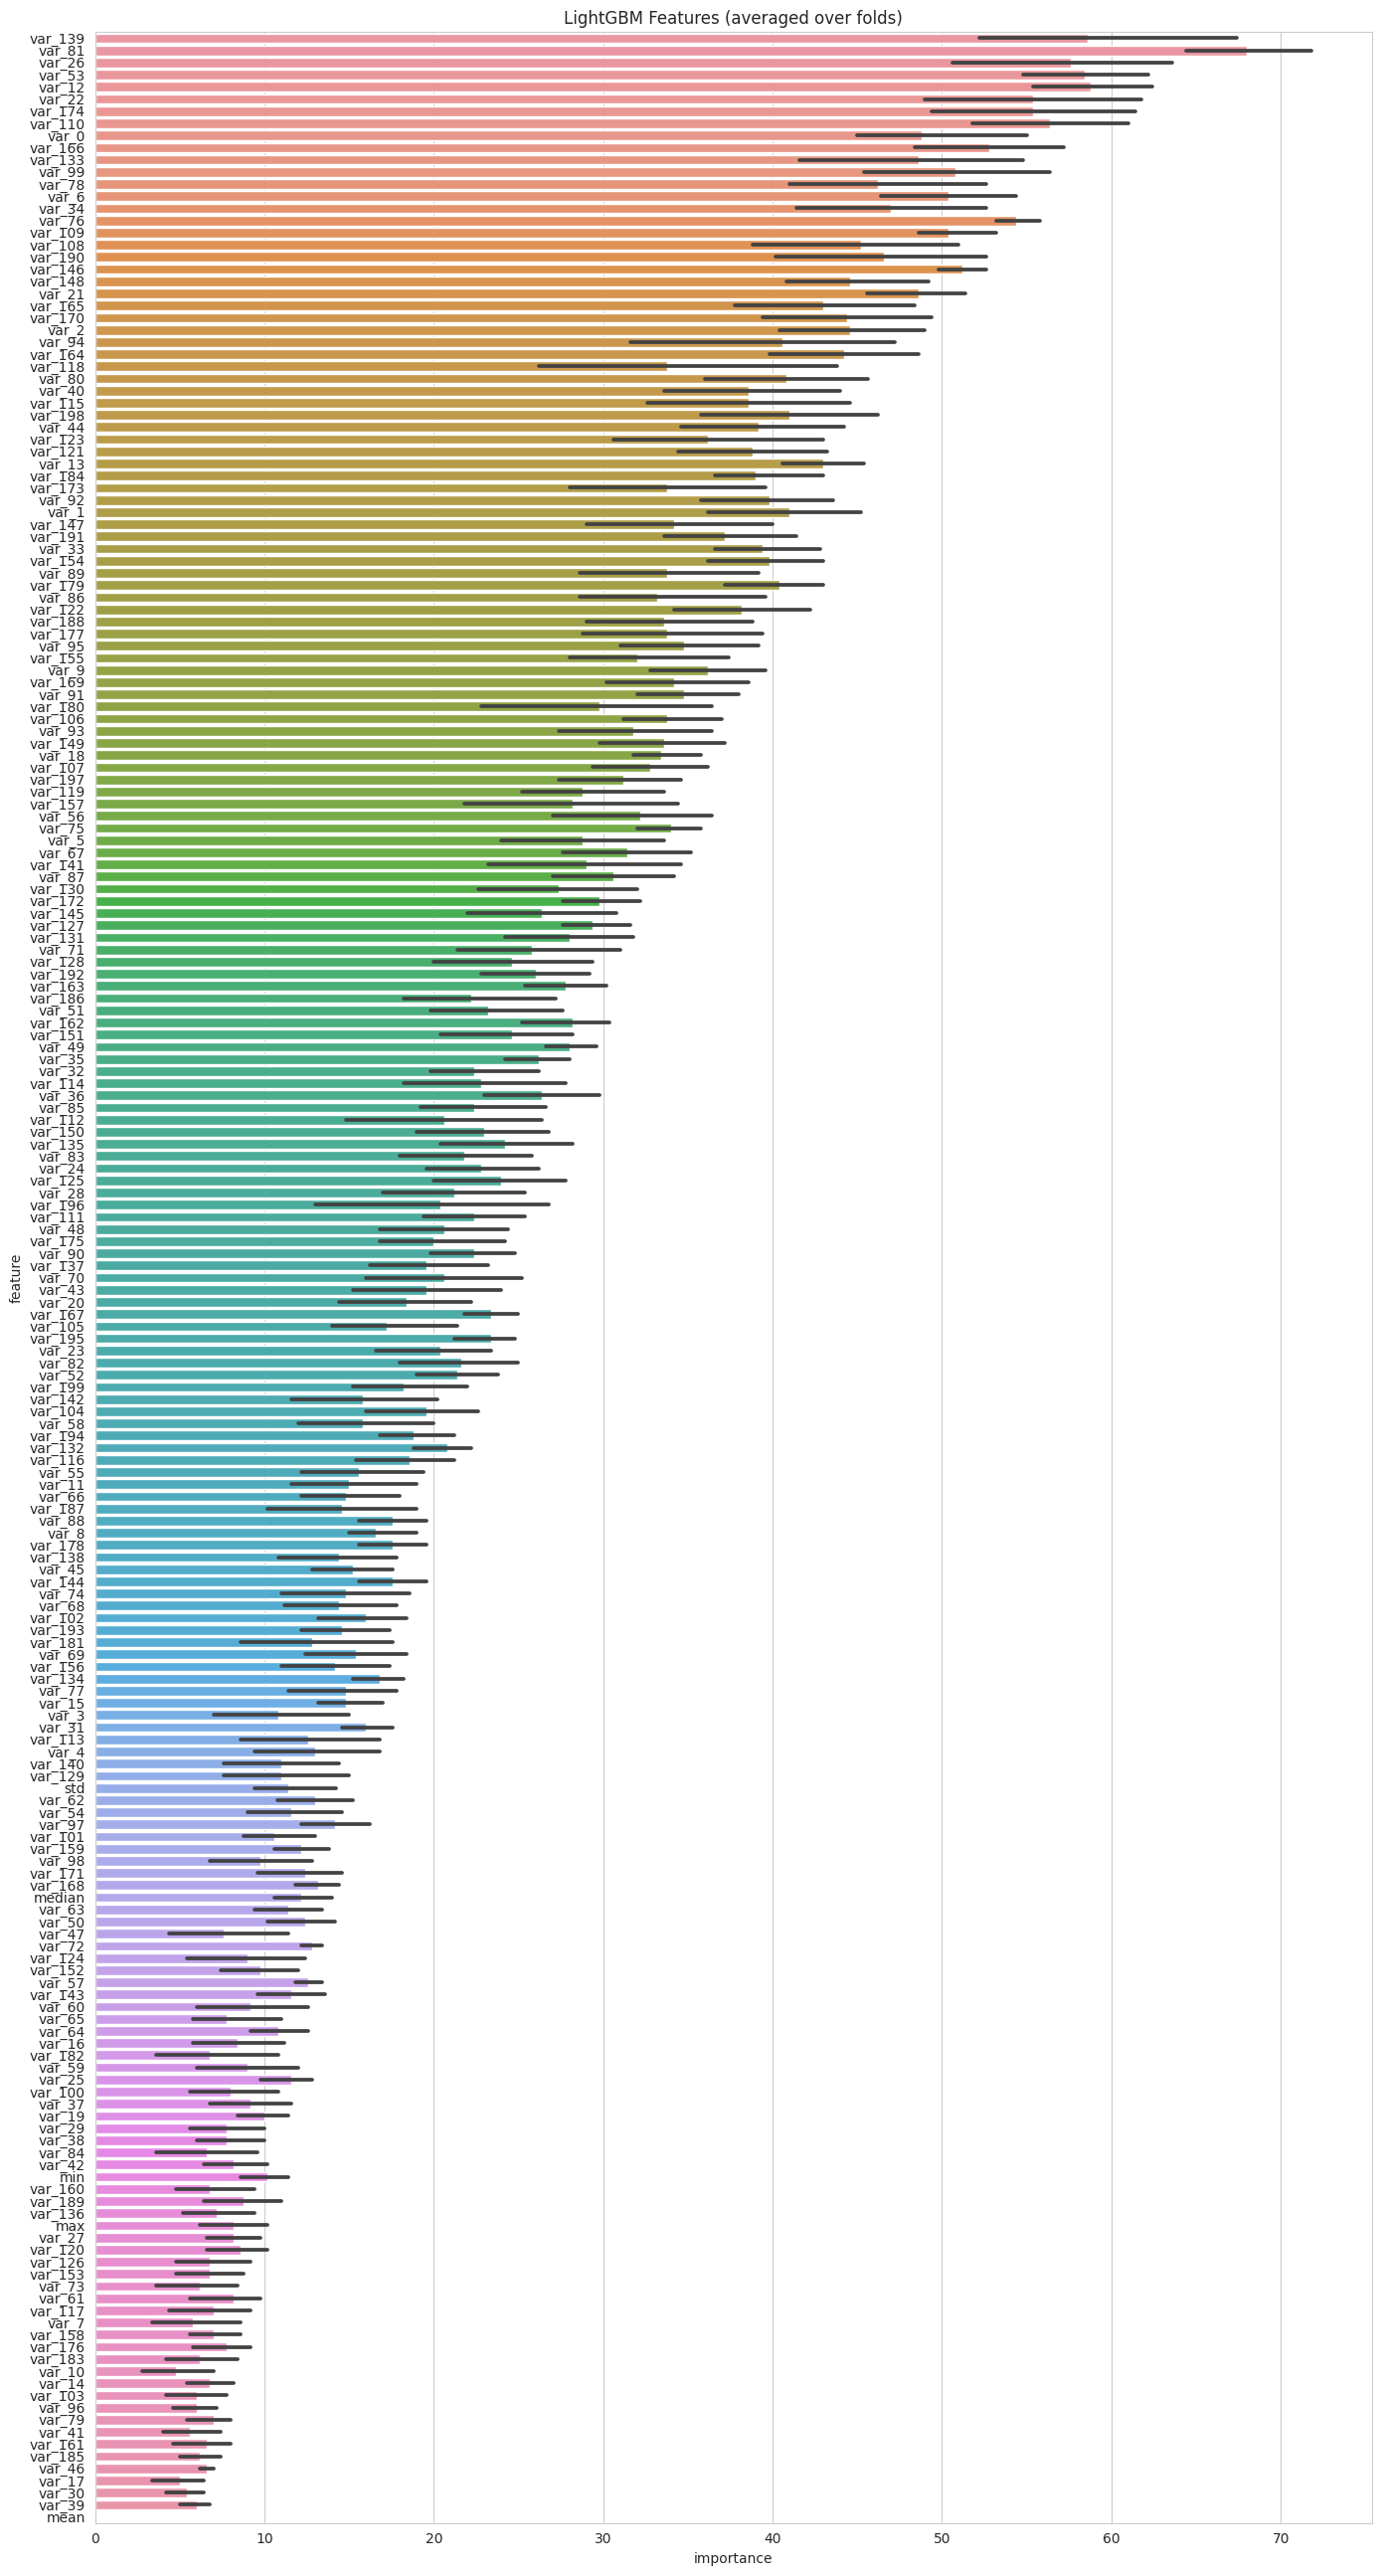

In [65]:
cols = (feature_importance_df[["feature", "importance"]]
        .groupby("feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:1000].index)
best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

plt.figure(figsize=(14,26))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('LightGBM Features (averaged over folds)')
plt.tight_layout()

In [66]:
sub_df = pd.DataFrame({"ID_code":test["ID_code"].values})
sub_df["target"] = predictions
sub_df.to_csv("lgb_submission.csv", index=False)

In [67]:
sub_df

ID_code    target
0            test_0  0.131672
1            test_1  0.294957
2            test_2  0.275314
3            test_3  0.234753
4            test_4  0.078854
...             ...       ...
199995  test_199995  0.067716
199996  test_199996 -0.041291
199997  test_199997 -0.025785
199998  test_199998  0.179363
199999  test_199999  0.123526

[200000 rows x 2 columns]

In [68]:
from sklearn.model_selection import KFold, StratifiedKFold
from catboost import Pool, CatBoostClassifier
model = CatBoostClassifier(loss_function="Logloss", eval_metric="AUC")
kf = KFold(n_splits=5, random_state=42, shuffle=True)

y_valid_pred = 0 * target
y_test_pred = 0

for idx, (train_index, valid_index) in enumerate(kf.split(train)):
    y_train, y_valid = target.iloc[train_index], target.iloc[valid_index]
    X_train, X_valid = train[features].iloc[train_index,:], train[features].iloc[valid_index,:]
    _train = Pool(X_train, label=y_train)
    _valid = Pool(X_valid, label=y_valid)
    print( "\nFold ", idx)
    fit_model = model.fit(_train,
                          eval_set=_valid,
                          use_best_model=True,
                          verbose=200
                         )
    pred = fit_model.predict_proba(X_valid)[:,1]
    print( "  auc = ", roc_auc_score(y_valid, pred) )
    y_valid_pred.iloc[valid_index] = pred
    y_test_pred += fit_model.predict_proba(test[features])[:,1]
y_test_pred /= 5


Fold  0
Learning rate set to 0.111001
0:	test: 0.5541673	best: 0.5541673 (0)	total: 264ms	remaining: 4m 23s
200:	test: 0.8801877	best: 0.8801877 (200)	total: 28s	remaining: 1m 51s
400:	test: 0.8913378	best: 0.8913378 (400)	total: 58.9s	remaining: 1m 28s
600:	test: 0.8938392	best: 0.8938392 (600)	total: 1m 28s	remaining: 58.9s
800:	test: 0.8948141	best: 0.8948461 (797)	total: 1m 58s	remaining: 29.6s
999:	test: 0.8948593	best: 0.8951176 (943)	total: 2m 27s	remaining: 0us

bestTest = 0.8951176254
bestIteration = 943

Shrink model to first 944 iterations.
  auc =  0.8951176253652997

Fold  1
Learning rate set to 0.111001
0:	test: 0.5507016	best: 0.5507016 (0)	total: 207ms	remaining: 3m 26s
200:	test: 0.8809225	best: 0.8809225 (200)	total: 28.6s	remaining: 1m 53s
400:	test: 0.8930277	best: 0.8930277 (400)	total: 59.5s	remaining: 1m 28s
600:	test: 0.8968863	best: 0.8969068 (598)	total: 1m 29s	remaining: 59.6s
800:	test: 0.8979043	best: 0.8979411 (788)	total: 1m 59s	remaining: 29.8s
999:	tes

In [69]:
sub_df1 = pd.DataFrame({"ID_code":test["ID_code"].values})
sub_df1["target"] = y_test_pred
sub_df1.to_csv("cat_submission.csv", index=False)

In [70]:
corr_df = pd.merge(sub_df,sub_df1,how='left',on='ID_code')
#corr_df.corr()
corr_df['target_x'].corr(corr_df['target_y'])

0.8507599151118675

In [71]:
sub_df2 = pd.DataFrame({"ID_code":test["ID_code"].values})
sub_df2["target"] = 0.5*sub_df["target"] + 0.5*sub_df1["target"]
sub_df2.to_csv("lgb_cat_submission.csv", index=False)